**Import Libraries**

In [ ]:
# Numpy
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# Warnings
import warnings

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Color output
from termcolor import colored

# Datetime
import datetime

# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical

print(colored('\nAll libraries imported succesfully', 'green'))


All libraries imported succesfully


**Library configurations**

In [ ]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a featur
pd.options.mode.copy_on_write = True

sns.set_style('darkgrid') # Seaborn style

warnings.filterwarnings('ignore') # Ignore warnings

print(colored('\nAll libraries configed succesfully', 'green'))


All libraries configed succesfully


**Importing Data**

In [ ]:
# Input train data
Train = pd.read_csv('train.csv')
Train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Input test data
Test = pd.read_csv('test.csv')
Test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


**Data Informations**

In [ ]:
# Describe
Train.describe().loc[['min', 'mean', '25%', '50%', '75%', 'max']].T.style.background_gradient(axis=1)

,min,mean,25%,50%,75%,max
battery_power,501.000000,1238.518500,851.750000,1226.000000,1615.250000,1998.000000
blue,0.000000,0.495000,0.000000,0.000000,1.000000,1.000000
clock_speed,0.500000,1.522250,0.700000,1.500000,2.200000,3.000000
dual_sim,0.000000,0.509500,0.000000,1.000000,1.000000,1.000000
fc,0.000000,4.309500,1.000000,3.000000,7.000000,19.000000
four_g,0.000000,0.521500,0.000000,1.000000,1.000000,1.000000
int_memory,2.000000,32.046500,16.000000,32.000000,48.000000,64.000000
m_dep,0.100000,0.501750,0.200000,0.500000,0.800000,1.000000
mobile_wt,80.000000,140.249000,109.000000,141.000000,170.000000,200.000000
n_cores,1.000000,4.520500,3.000000,4.000000,7.000000,8.000000


In [9]:
# Train Information
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**Explain Columns**


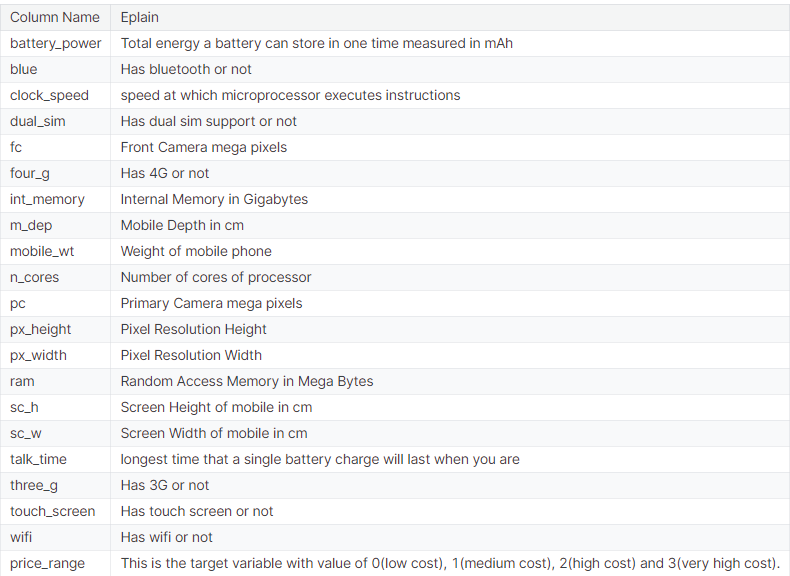

**Plots**

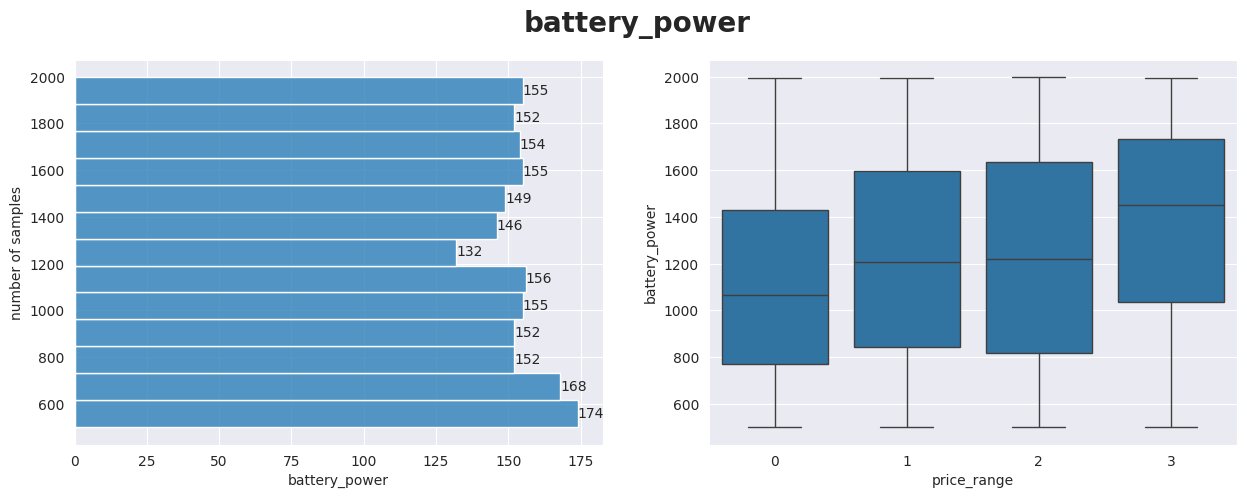

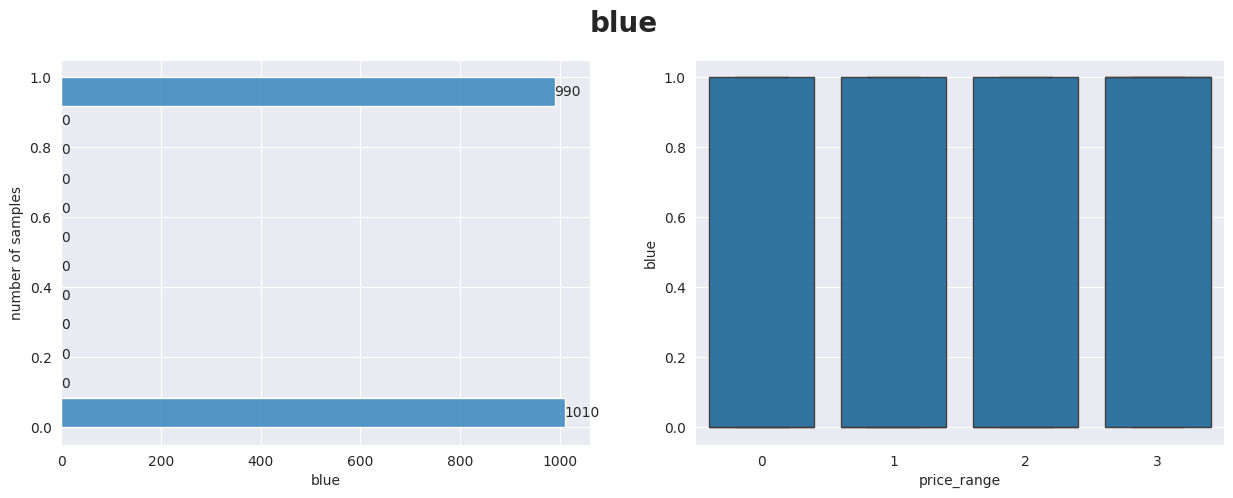

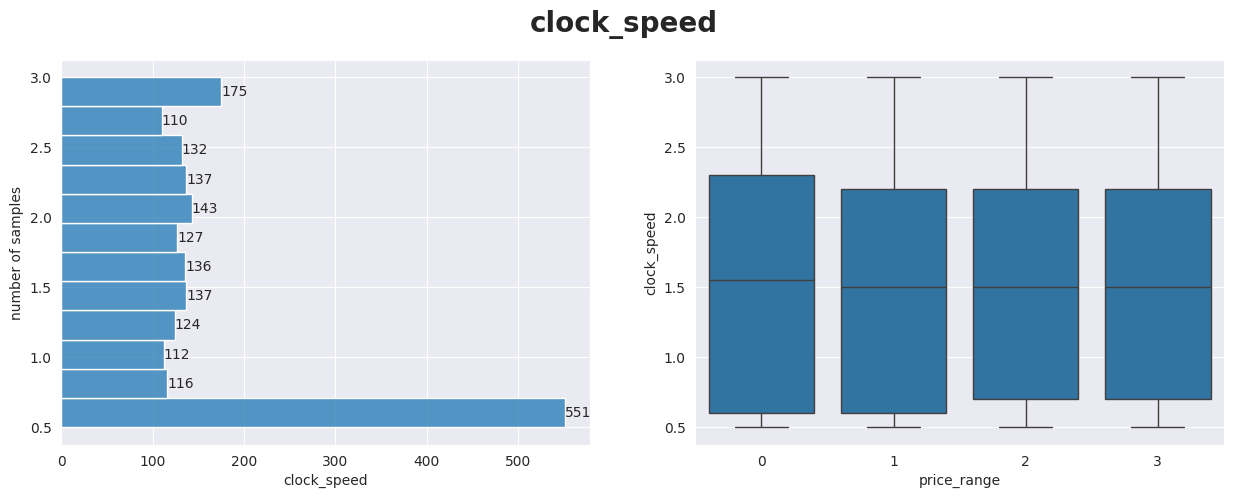

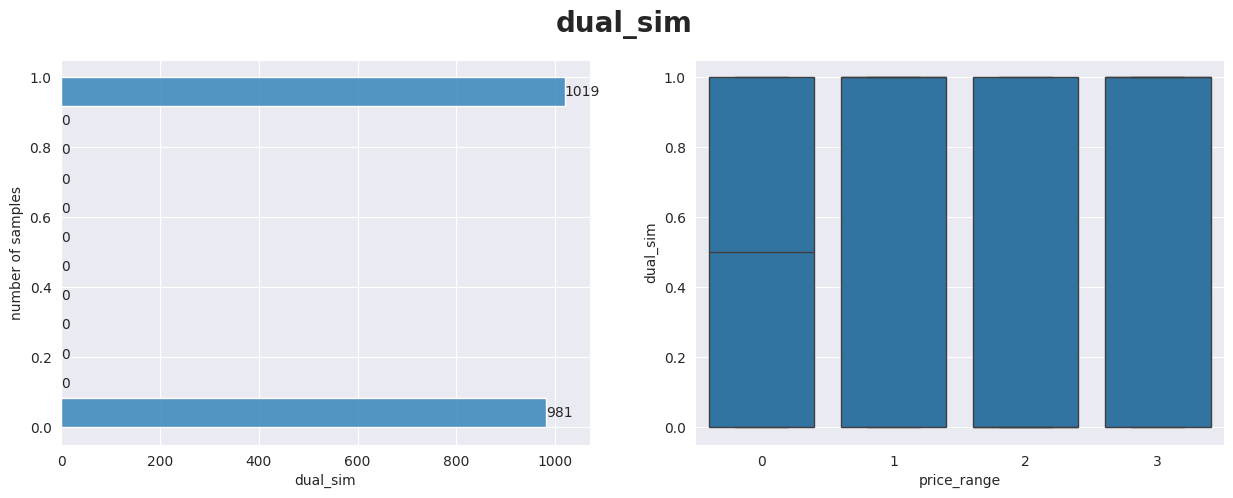

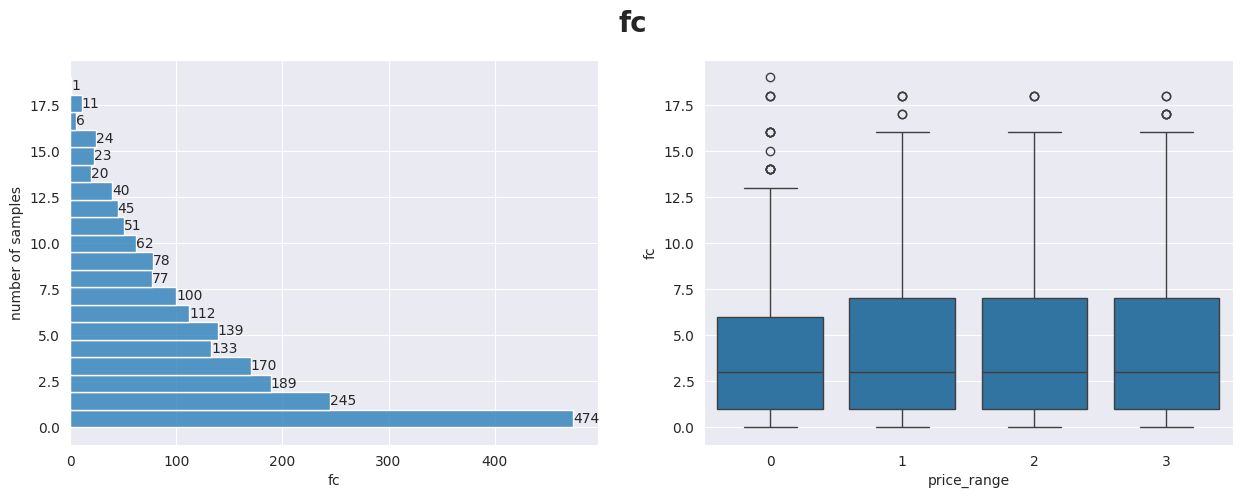

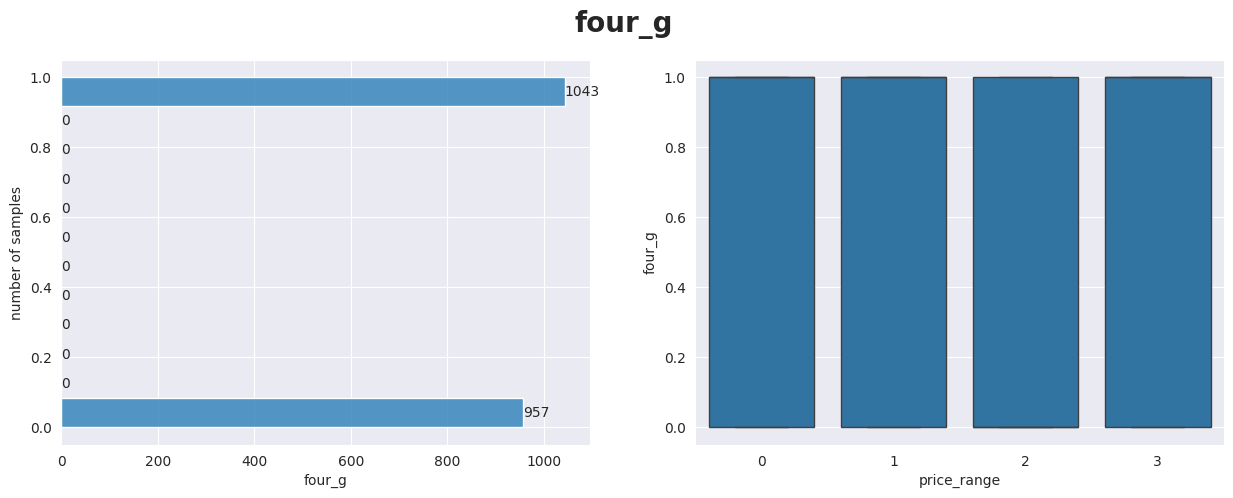

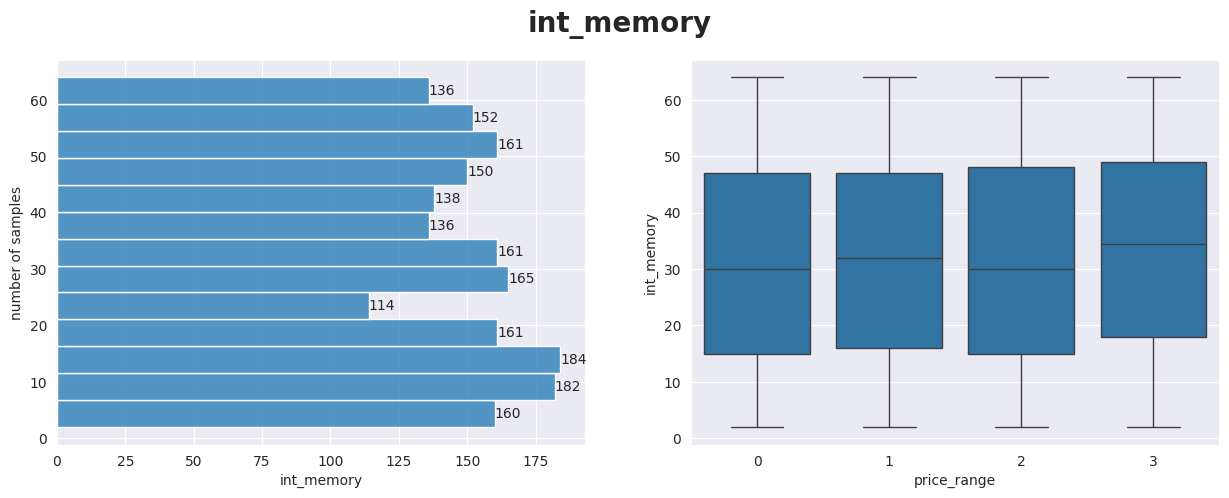

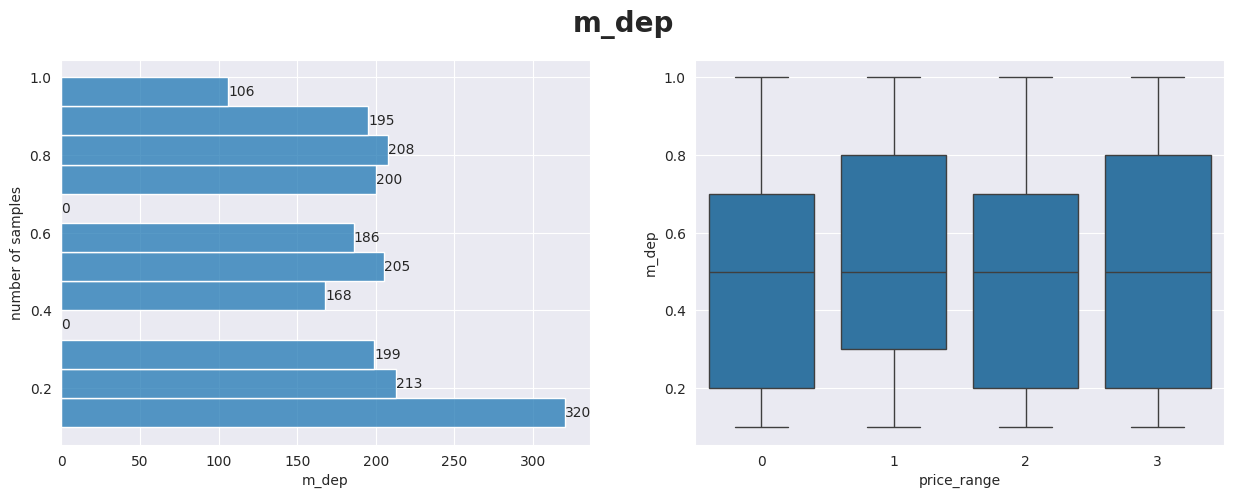

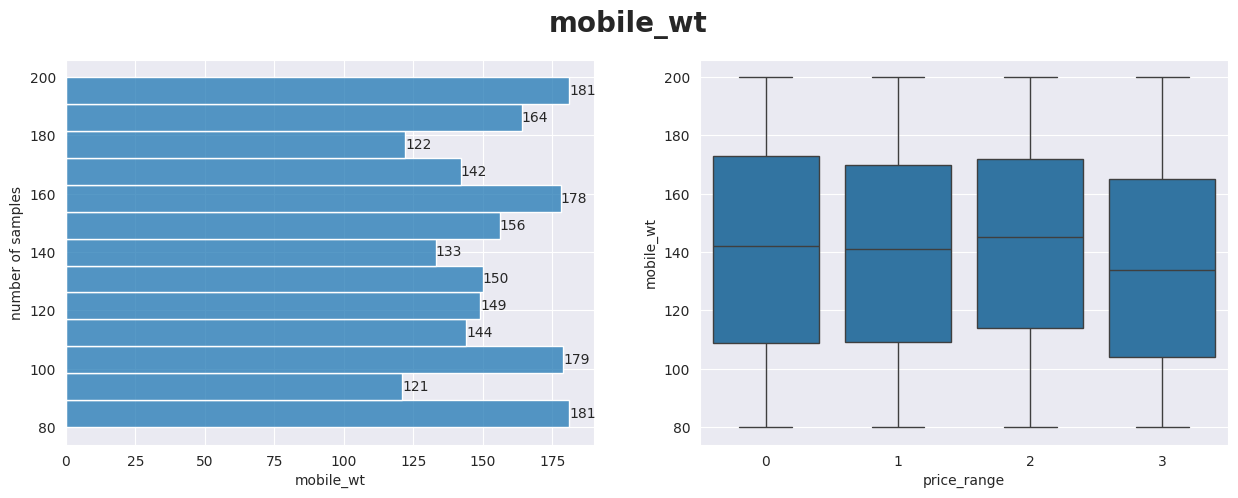

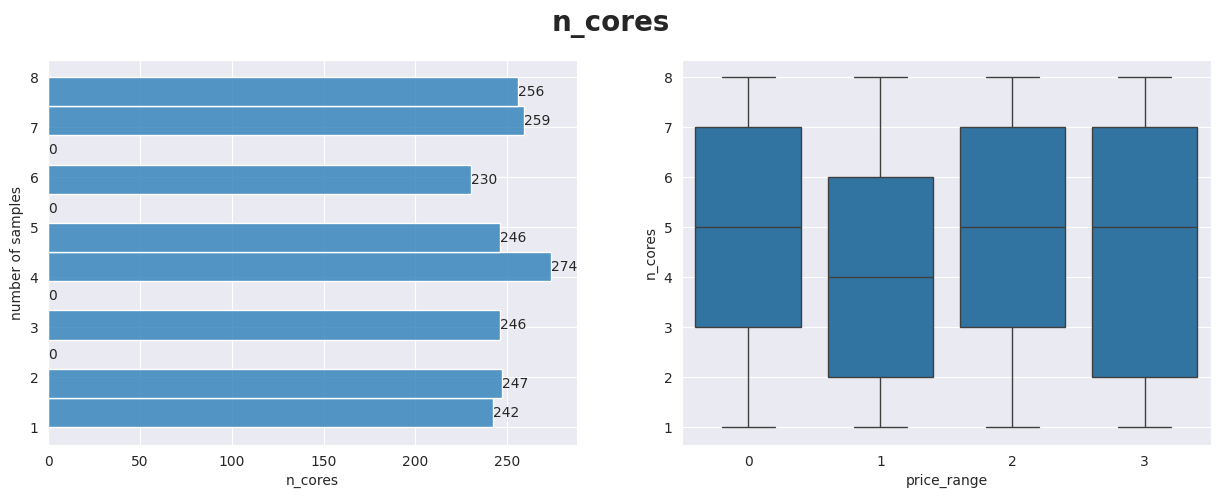

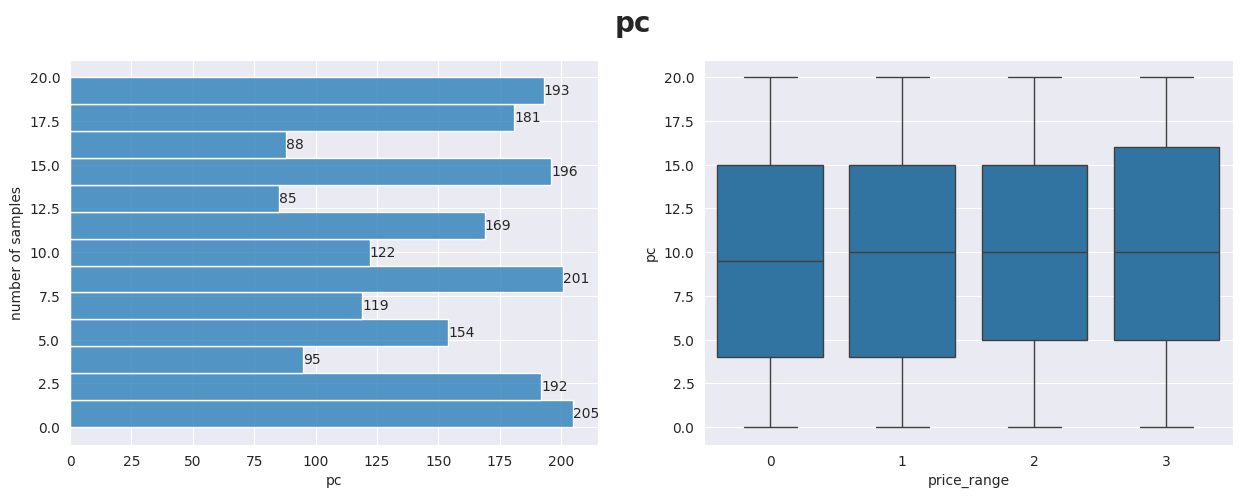

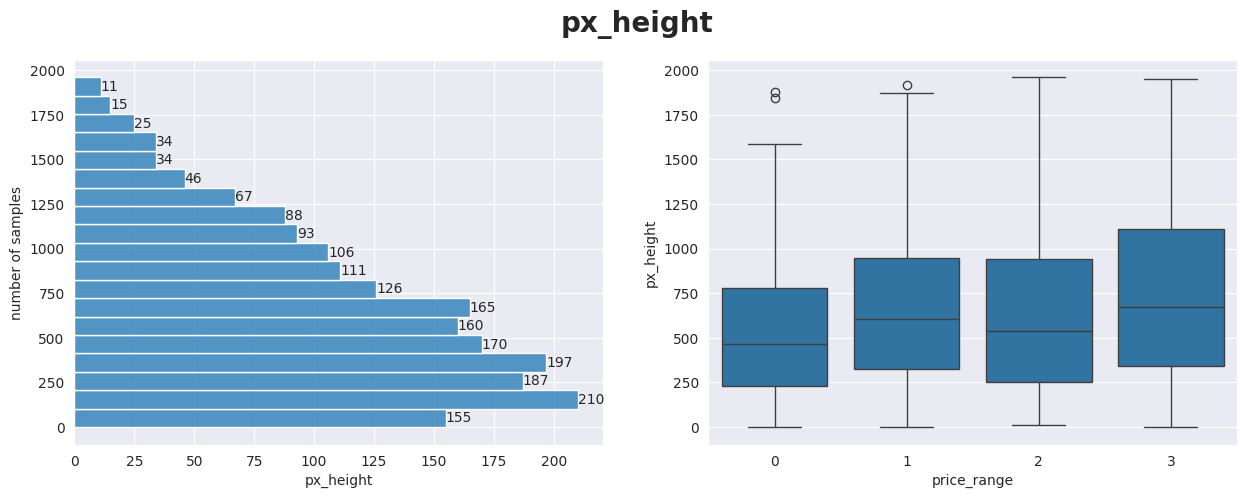

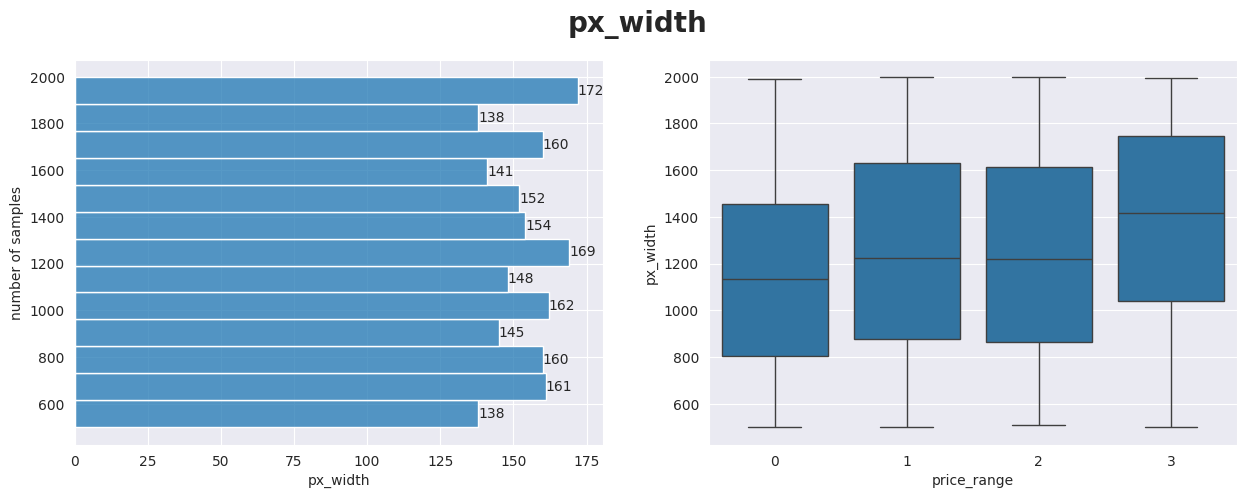

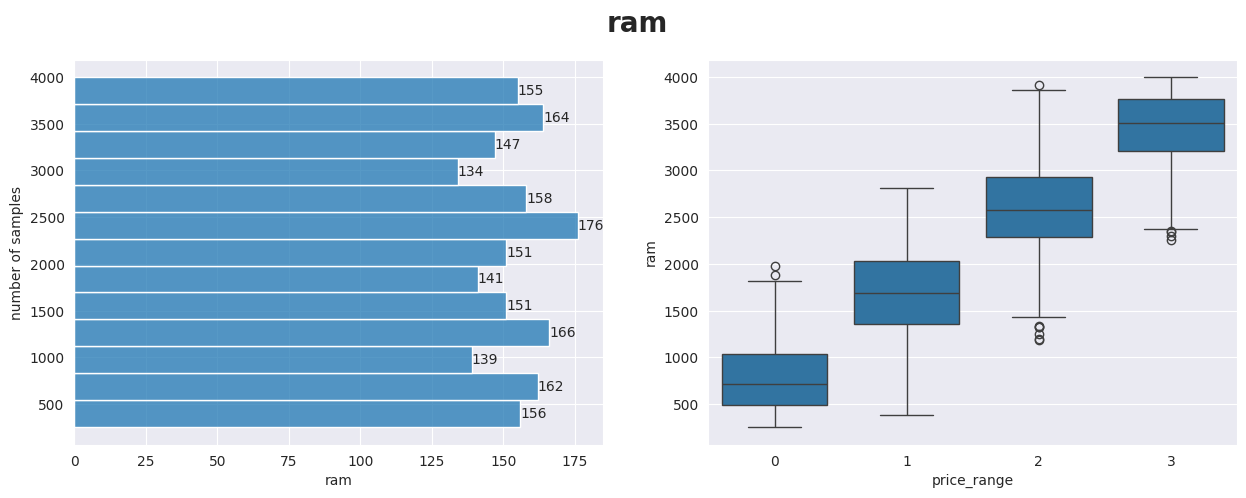

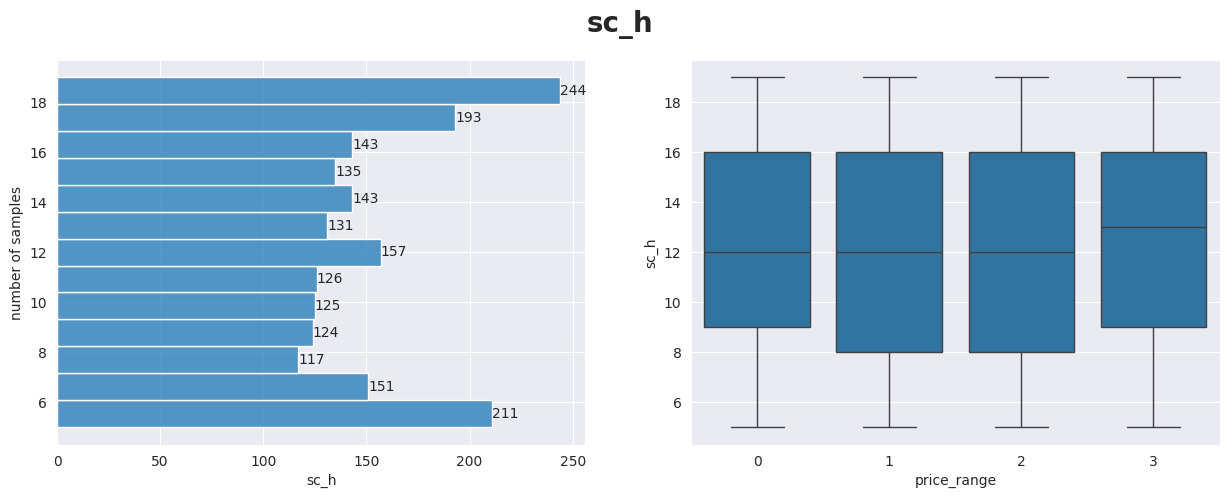

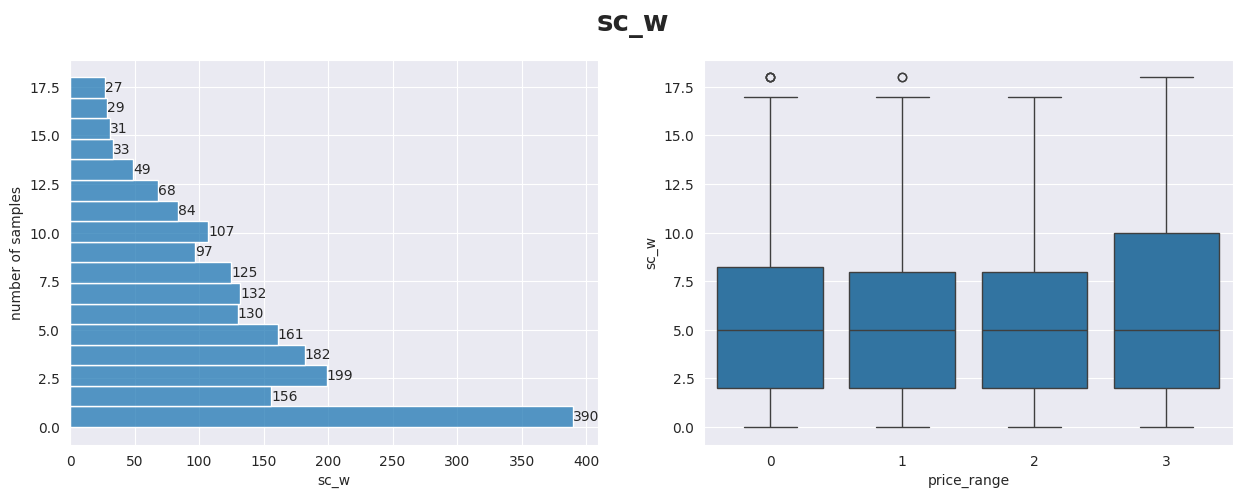

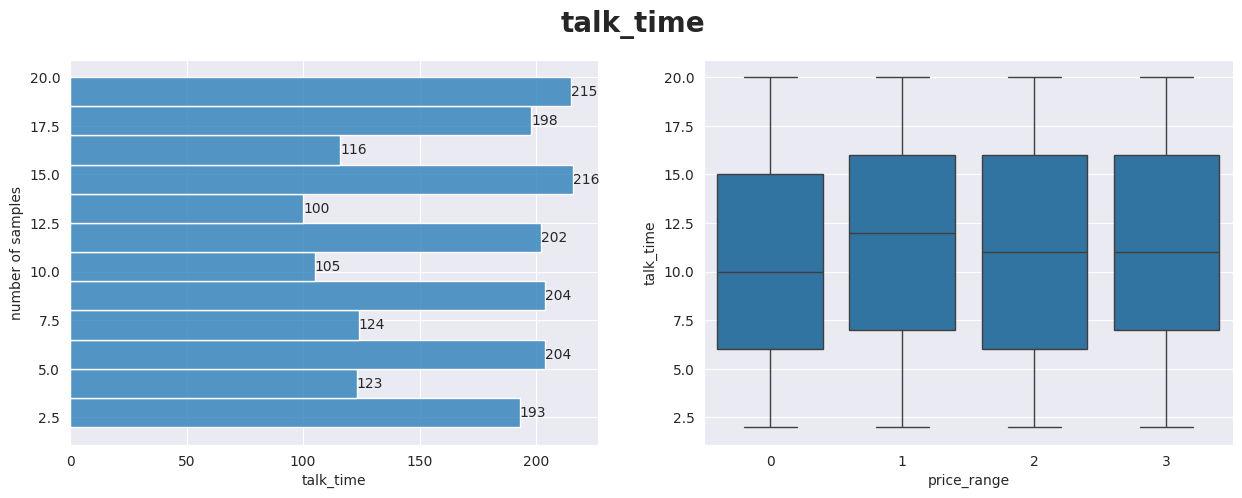

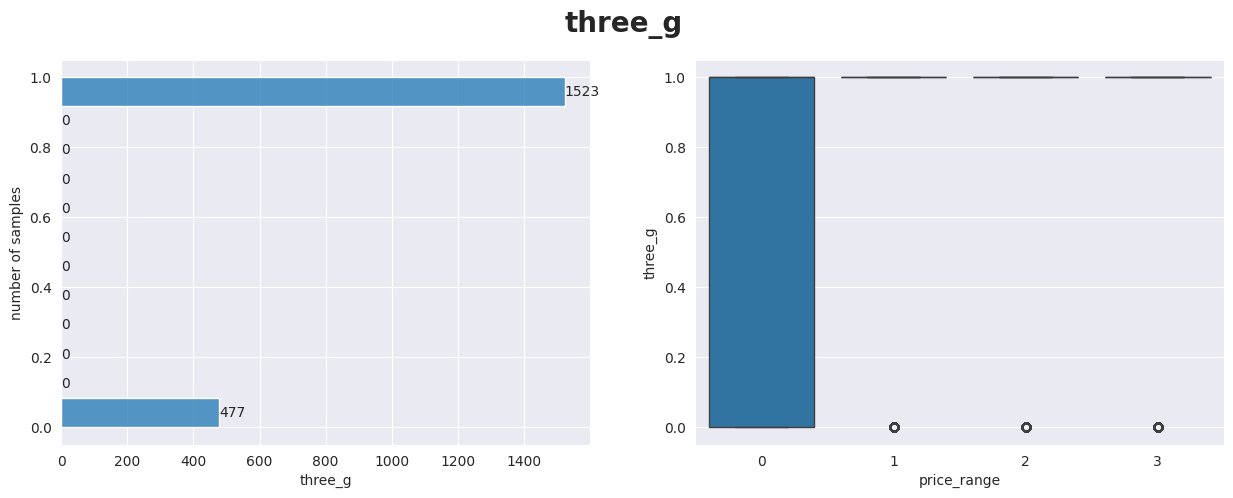

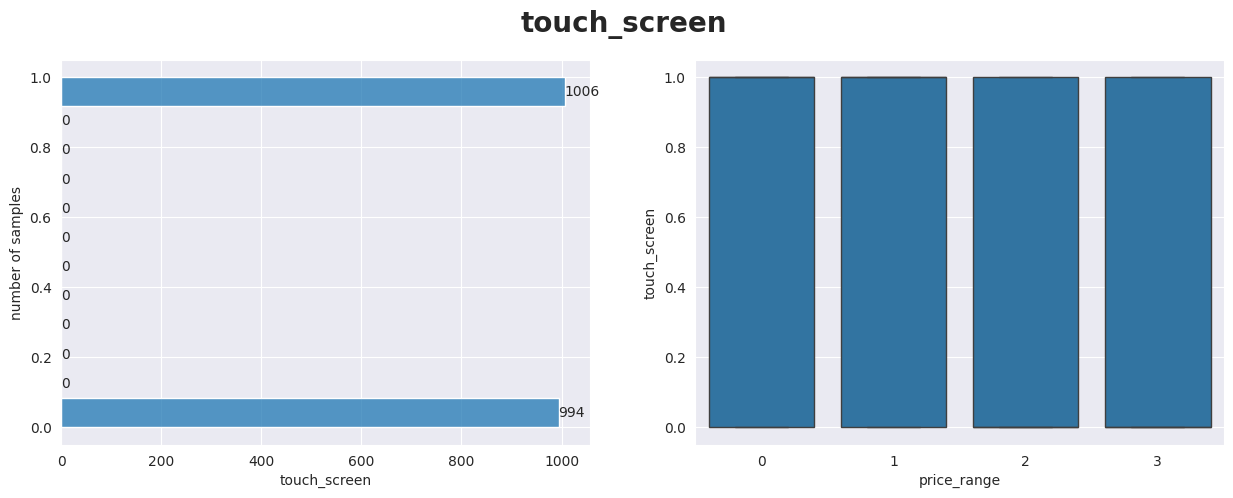

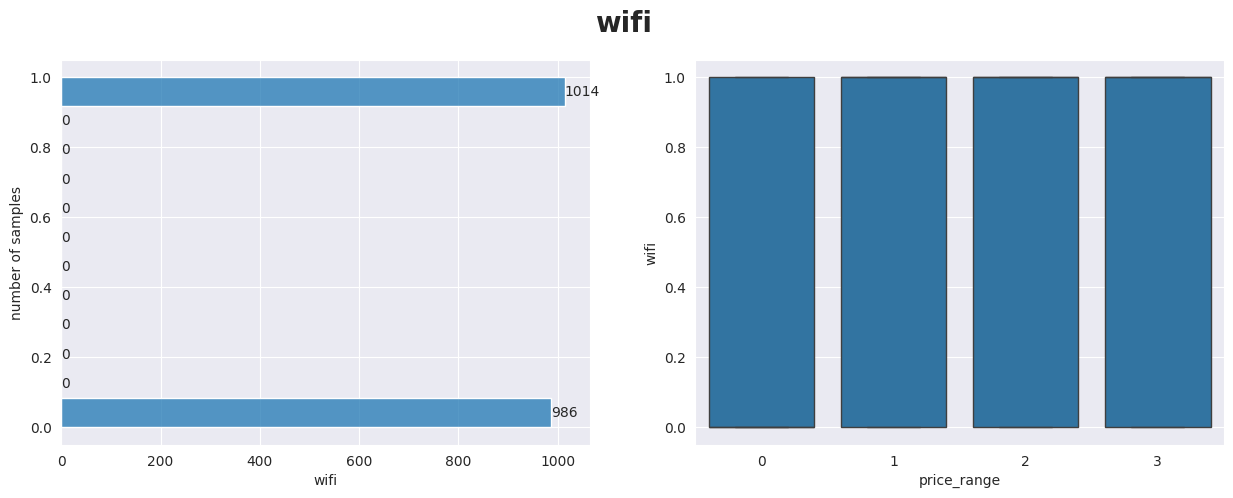

In [10]:
for col in Train.columns[:-1] :
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    plt.suptitle(col, fontsize=20, fontweight='bold')
    # Left Ax
    ax0 = sns.histplot(y=col, data=Train, ax=ax[0])
    ax0.bar_label(ax0.containers[0])
    ax0.set(xlabel=col, ylabel='number of samples')
    # Right Ax
    ax1 = sns.boxplot(x='price_range', y=col, data=Train, ax=ax[1])


price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


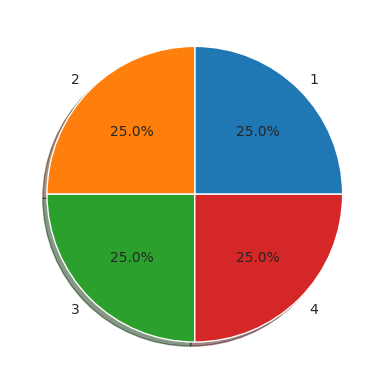

In [11]:
print(Train.price_range.value_counts())


d = Train[['price_range']]
d = d.groupby('price_range').size()
labels = ['1', '2', '3', '4']
# explode = (0, 0.1)
plt.pie(d, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()

**Coorelation Heatmap**

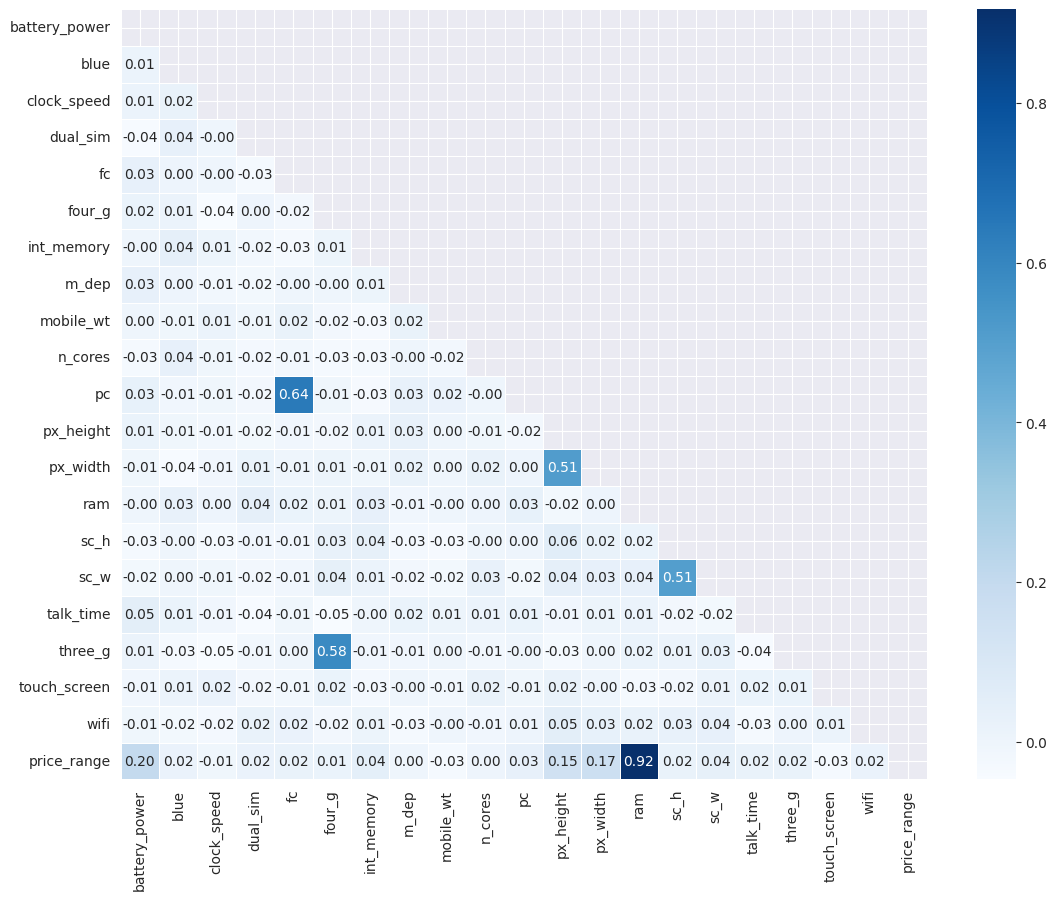

In [12]:
corr = Train.corr()
plt.figure(figsize=(13, 10))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
plt.show()

In [13]:
# columns that are/is in Train and doesnt in Test

diff = []
for element in list(Train.columns):
    if element not in list(Test.columns):
        diff.append(element)

print(colored('{} just in Train DataFrame.'.format(diff), 'blue'))

['price_range'] just in Train DataFrame.


In [14]:
# columns that are/is in Test and doesnt in Train

diff = []
for element in list(Test.columns):
    if element not in list(Train.columns):
        diff.append(element)

print(colored('{} just in Test DataFrame.'.format(diff), 'blue'))

['id'] just in Test DataFrame.


In [15]:
# Drop id in test, its unnessesary
Test.drop(columns='id', inplace=True)

In [16]:
y_train_full = Train.price_range
Train.drop(columns='price_range', inplace=True)

In [17]:
Train.columns == Test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

**Normalization**

In [18]:
columns = Train.columns

In [19]:
# Normalize
scaler = preprocessing.StandardScaler()
# Fit data to normalization
Norm_train = scaler.fit_transform(Train)
Norm_test = scaler.transform(Test)
# Convert normalized data to a DataFrame
X_train_full = pd.DataFrame(Norm_train, columns=columns)
X_test = pd.DataFrame(Norm_test, columns=columns)

In [20]:
X_train_full.describe().loc[['min', 'mean', 'std', 'max']].T.style.background_gradient(axis=1)

,min,mean,std,max
battery_power,-1.678817,0.000000,1.000250,1.728812
blue,-0.990050,-0.000000,1.000250,1.010051
clock_speed,-1.253064,-0.000000,1.000250,1.811412
dual_sim,-1.019184,0.000000,1.000250,0.981177
fc,-0.992890,0.000000,1.000250,3.384628
four_g,-1.043966,0.000000,1.000250,0.957886
int_memory,-1.656260,-0.000000,1.000250,1.761380
m_dep,-1.393304,-0.000000,1.000250,1.727974
mobile_wt,-1.702391,0.000000,1.000250,1.688320
n_cores,-1.539175,-0.000000,1.000250,1.521249


**Missing Values**

In [21]:
X_train_full.isna().sum().sum()

0

In [22]:
X_test.isna().sum().sum()

0

**Modeling**

In [23]:
y_train_full = to_categorical(y_train_full)

In [24]:
# create X_val and y_val with 10% of training data
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, random_state=0, test_size=0.1)

In [25]:
print(colored('<<< Variables shape >>>', 'blue'))
print('-'*30)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('--------------------------')
print('X_val', X_val.shape)
print('y_val', y_val.shape)
print('--------------------------')
print('X_test', X_test.shape)
print('y_test', X_test.shape[0])

<<< Variables shape >>>
------------------------------
X_train (1800, 20)
y_train (1800, 4)
--------------------------
X_val (200, 20)
y_val (200, 4)
--------------------------
X_test (1000, 20)
y_test 1000


In [26]:
# Create a Neuron Network model with 4 layer, activation='ELU'

model = models.Sequential()
model.add(layers.Dense(300, activation='ELU', input_shape=(20, )))
model.add(layers.Dense(200, activation='ELU'))
model.add(layers.Dense(100, activation='ELU'))
model.add(layers.Dense(4, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['categorical_accuracy'])

history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_data=(X_val, y_val))

Epoch 1/30
57/57 [==============================] - 3s 16ms/step - loss: 1.1378 - categorical_accuracy: 0.5183 - val_loss: 0.9408 - val_categorical_accuracy: 0.6550
Epoch 2/30
57/57 [==============================] - 0s 8ms/step - loss: 0.8461 - categorical_accuracy: 0.6606 - val_loss: 0.7610 - val_categorical_accuracy: 0.7050
Epoch 3/30
57/57 [==============================] - 1s 11ms/step - loss: 0.7078 - categorical_accuracy: 0.7194 - val_loss: 0.6535 - val_categorical_accuracy: 0.7950
Epoch 4/30
57/57 [==============================] - 1s 11ms/step - loss: 0.6152 - categorical_accuracy: 0.7883 - val_loss: 0.5711 - val_categorical_accuracy: 0.8400
Epoch 5/30
57/57 [==============================] - 1s 10ms/step - loss: 0.5443 - categorical_accuracy: 0.8406 - val_loss: 0.5123 - val_categorical_accuracy: 0.8800
Epoch 6/30
57/57 [==============================] - 1s 11ms/step - loss: 0.4856 - categorical_accuracy: 0.8744 - val_loss: 0.4611 - val_categorical_accuracy: 0.8850
Epoch 7/30


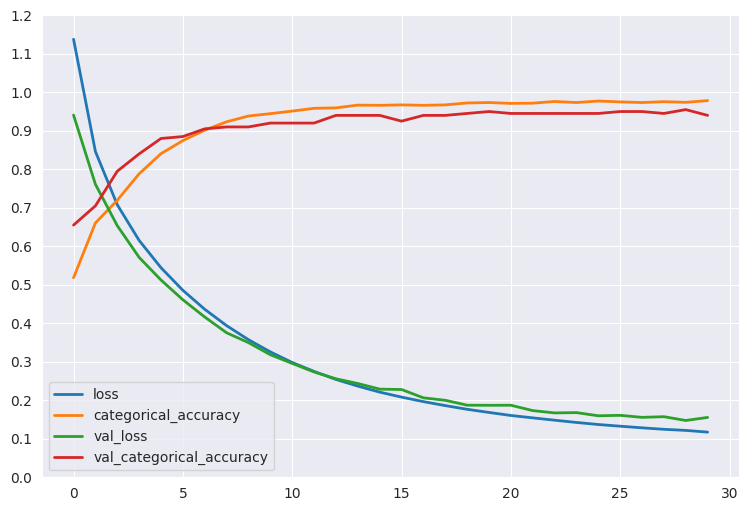

In [27]:
pd.DataFrame(history.history).plot(figsize=(9, 6), linewidth=2)
plt.yticks(np.arange(0, 1.3, 0.1))
plt.show()

In [28]:
# y_pred is probability of each class for each sample
y_proba = model.predict(X_test)
y_proba

32/32 [==============================] - 0s 3ms/step


array([[3.6306128e-10, 4.3510283e-07, 4.4471756e-01, 5.5528206e-01],
       [7.8860741e-13, 1.6289580e-09, 4.1865442e-02, 9.5813459e-01],
       [1.1636474e-08, 3.2870739e-05, 6.3678527e-01, 3.6318189e-01],
       ...,
       [6.9623768e-01, 3.0375990e-01, 2.4391700e-06, 4.8163140e-10],
       [2.0016778e-05, 4.5050889e-02, 9.5341480e-01, 1.5142565e-03],
       [3.2075138e-07, 1.4807899e-03, 9.9288523e-01, 5.6338040e-03]],
      dtype=float32)

In [29]:
# Each samples predicted class
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 0, 3, 3, 3, 0, 1, 0, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 3, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

Result :

loss : 0.1236

categorical_accuracy : 0.9772

val_loss : 0.1324

val_categorical_accuracy : 0.9600